In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets #in thousands of dollars

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
#Here, we normalize the train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#Note that you should never use any quantity computed from the test data, even for data normalization!
test_data -= mean
test_data /= std

In [6]:
#Prevent Tensorflow from allocating my entire GPU
import keras

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [26]:
from keras import models
from keras import layers

#A method to build the model (since we are using the same model multiple times)

model = models.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(train_data.shape[1],)))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [27]:
#Test our model

history = model.fit(train_data, train_targets, validation_split = 0.2, epochs=500, batch_size=1, verbose=1)

history_dict = history.history
history_dict.keys()

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 1ms/step - loss: 558.0755 - mean_absolute_error: 21.9311 - val_loss: 618.6537 - val_mean_absolute_error: 23.3083
Epoch 2/500
323/323 [==============================] - 0s 969us/step - loss: 540.7611 - mean_absolute_error: 21.6416 - val_loss: 600.2885 - val_mean_absolute_error: 22.9801
Epoch 3/500
323/323 [==============================] - 0s 984us/step - loss: 524.3371 - mean_absolute_error: 21.3499 - val_loss: 582.6296 - val_mean_absolute_error: 22.6497
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 508.6203 - mean_absolute_error: 21.0604 - val_loss: 565.6734 - val_mean_absolute_error: 22.3226
Epoch 5/500
323/323 [==============================] - 0s 972us/step - loss: 493.5655 - mean_absolute_error: 20.7533 - val_loss: 549.5952 - val_mean_absolute_error: 21.9993
Epoch 6/500
323/323 [==============================] - 0s 966us/step - loss: 479.1228 - mean_a

323/323 [==============================] - 0s 961us/step - loss: 116.5996 - mean_absolute_error: 8.5027 - val_loss: 147.6758 - val_mean_absolute_error: 9.4564
Epoch 49/500
323/323 [==============================] - 0s 987us/step - loss: 112.3973 - mean_absolute_error: 8.2529 - val_loss: 143.2759 - val_mean_absolute_error: 9.2215
Epoch 50/500
323/323 [==============================] - 0s 969us/step - loss: 108.2591 - mean_absolute_error: 8.0079 - val_loss: 138.7363 - val_mean_absolute_error: 8.9861
Epoch 51/500
323/323 [==============================] - 0s 981us/step - loss: 104.1061 - mean_absolute_error: 7.7641 - val_loss: 134.1146 - val_mean_absolute_error: 8.7517
Epoch 52/500
323/323 [==============================] - 0s 968us/step - loss: 100.3479 - mean_absolute_error: 7.5200 - val_loss: 130.1152 - val_mean_absolute_error: 8.5171
Epoch 53/500
323/323 [==============================] - 0s 1ms/step - loss: 96.5987 - mean_absolute_error: 7.2883 - val_loss: 126.0754 - val_mean_absolut

323/323 [==============================] - 0s 975us/step - loss: 34.5300 - mean_absolute_error: 3.6879 - val_loss: 47.3864 - val_mean_absolute_error: 4.3992
Epoch 97/500
323/323 [==============================] - 0s 974us/step - loss: 34.1617 - mean_absolute_error: 3.6674 - val_loss: 46.5992 - val_mean_absolute_error: 4.3679
Epoch 98/500
323/323 [==============================] - 0s 954us/step - loss: 33.7744 - mean_absolute_error: 3.6559 - val_loss: 46.0328 - val_mean_absolute_error: 4.3450
Epoch 99/500
323/323 [==============================] - 0s 978us/step - loss: 33.4916 - mean_absolute_error: 3.6372 - val_loss: 45.5210 - val_mean_absolute_error: 4.3280
Epoch 100/500
323/323 [==============================] - 0s 958us/step - loss: 33.1825 - mean_absolute_error: 3.6265 - val_loss: 44.9137 - val_mean_absolute_error: 4.3052
Epoch 101/500
323/323 [==============================] - 0s 967us/step - loss: 32.8015 - mean_absolute_error: 3.6124 - val_loss: 44.4349 - val_mean_absolute_error

323/323 [==============================] - 0s 980us/step - loss: 25.4708 - mean_absolute_error: 3.2459 - val_loss: 29.9720 - val_mean_absolute_error: 3.6316
Epoch 145/500
323/323 [==============================] - 0s 1ms/step - loss: 25.4130 - mean_absolute_error: 3.2385 - val_loss: 29.8779 - val_mean_absolute_error: 3.6266
Epoch 146/500
323/323 [==============================] - 0s 987us/step - loss: 25.3731 - mean_absolute_error: 3.2382 - val_loss: 29.7090 - val_mean_absolute_error: 3.6143
Epoch 147/500
323/323 [==============================] - 0s 982us/step - loss: 25.2903 - mean_absolute_error: 3.2333 - val_loss: 29.4803 - val_mean_absolute_error: 3.5989
Epoch 148/500
323/323 [==============================] - 0s 1ms/step - loss: 25.2474 - mean_absolute_error: 3.2338 - val_loss: 29.3551 - val_mean_absolute_error: 3.5937
Epoch 149/500
323/323 [==============================] - 0s 1ms/step - loss: 25.1400 - mean_absolute_error: 3.2292 - val_loss: 29.2011 - val_mean_absolute_error: 3

323/323 [==============================] - 0s 921us/step - loss: 23.9166 - mean_absolute_error: 3.1786 - val_loss: 26.5613 - val_mean_absolute_error: 3.4832
Epoch 193/500
323/323 [==============================] - 0s 956us/step - loss: 23.9399 - mean_absolute_error: 3.1808 - val_loss: 26.5119 - val_mean_absolute_error: 3.4821
Epoch 194/500
323/323 [==============================] - 0s 958us/step - loss: 23.9113 - mean_absolute_error: 3.1788 - val_loss: 26.5151 - val_mean_absolute_error: 3.4828
Epoch 195/500
323/323 [==============================] - 0s 973us/step - loss: 23.8820 - mean_absolute_error: 3.1794 - val_loss: 26.3805 - val_mean_absolute_error: 3.4726
Epoch 196/500
323/323 [==============================] - 0s 964us/step - loss: 23.8517 - mean_absolute_error: 3.1782 - val_loss: 26.3310 - val_mean_absolute_error: 3.4735
Epoch 197/500
323/323 [==============================] - 0s 965us/step - loss: 23.8348 - mean_absolute_error: 3.1794 - val_loss: 26.2431 - val_mean_absolute_er

323/323 [==============================] - 0s 959us/step - loss: 23.5364 - mean_absolute_error: 3.1880 - val_loss: 25.5956 - val_mean_absolute_error: 3.4495
Epoch 241/500
323/323 [==============================] - 0s 1ms/step - loss: 23.5143 - mean_absolute_error: 3.1881 - val_loss: 25.6371 - val_mean_absolute_error: 3.4566
Epoch 242/500
323/323 [==============================] - 0s 977us/step - loss: 23.5400 - mean_absolute_error: 3.1869 - val_loss: 25.6399 - val_mean_absolute_error: 3.4580
Epoch 243/500
323/323 [==============================] - 0s 969us/step - loss: 23.5312 - mean_absolute_error: 3.1878 - val_loss: 25.6432 - val_mean_absolute_error: 3.4594
Epoch 244/500
323/323 [==============================] - 0s 994us/step - loss: 23.5154 - mean_absolute_error: 3.1869 - val_loss: 25.5879 - val_mean_absolute_error: 3.4548
Epoch 245/500
323/323 [==============================] - 0s 1ms/step - loss: 23.5002 - mean_absolute_error: 3.1871 - val_loss: 25.5277 - val_mean_absolute_error:

323/323 [==============================] - ETA: 0s - loss: 23.2201 - mean_absolute_error: 3.16 - 0s 937us/step - loss: 23.3922 - mean_absolute_error: 3.1891 - val_loss: 25.3903 - val_mean_absolute_error: 3.4503
Epoch 289/500
323/323 [==============================] - 0s 925us/step - loss: 23.3687 - mean_absolute_error: 3.1884 - val_loss: 25.3949 - val_mean_absolute_error: 3.4524
Epoch 290/500
323/323 [==============================] - 0s 971us/step - loss: 23.3651 - mean_absolute_error: 3.1890 - val_loss: 25.3741 - val_mean_absolute_error: 3.4526
Epoch 291/500
323/323 [==============================] - 0s 978us/step - loss: 23.3232 - mean_absolute_error: 3.1885 - val_loss: 25.4627 - val_mean_absolute_error: 3.4605
Epoch 292/500
323/323 [==============================] - 0s 955us/step - loss: 23.3883 - mean_absolute_error: 3.1873 - val_loss: 25.3872 - val_mean_absolute_error: 3.4523
Epoch 293/500
323/323 [==============================] - 0s 945us/step - loss: 23.3410 - mean_absolute_er

Epoch 336/500
323/323 [==============================] - 0s 994us/step - loss: 23.3084 - mean_absolute_error: 3.1934 - val_loss: 25.3040 - val_mean_absolute_error: 3.4431
Epoch 337/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2747 - mean_absolute_error: 3.1931 - val_loss: 25.3773 - val_mean_absolute_error: 3.4489
Epoch 338/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2813 - mean_absolute_error: 3.1934 - val_loss: 25.3871 - val_mean_absolute_error: 3.4516
Epoch 339/500
323/323 [==============================] - 0s 1ms/step - loss: 23.3113 - mean_absolute_error: 3.1940 - val_loss: 25.3590 - val_mean_absolute_error: 3.4484
Epoch 340/500
323/323 [==============================] - 0s 964us/step - loss: 23.2974 - mean_absolute_error: 3.1934 - val_loss: 25.3421 - val_mean_absolute_error: 3.4476
Epoch 341/500
323/323 [==============================] - 0s 988us/step - loss: 23.2769 - mean_absolute_error: 3.1933 - val_loss: 25.2947 - val_mean_abs

323/323 [==============================] - 0s 921us/step - loss: 23.2153 - mean_absolute_error: 3.1978 - val_loss: 25.1140 - val_mean_absolute_error: 3.4344
Epoch 385/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2233 - mean_absolute_error: 3.1998 - val_loss: 25.2464 - val_mean_absolute_error: 3.4468
Epoch 386/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2249 - mean_absolute_error: 3.1999 - val_loss: 25.2170 - val_mean_absolute_error: 3.4414
Epoch 387/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2316 - mean_absolute_error: 3.1983 - val_loss: 25.1671 - val_mean_absolute_error: 3.4360
Epoch 388/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2371 - mean_absolute_error: 3.1966 - val_loss: 25.1650 - val_mean_absolute_error: 3.4343
Epoch 389/500
323/323 [==============================] - 0s 1ms/step - loss: 23.2089 - mean_absolute_error: 3.1953 - val_loss: 25.2274 - val_mean_absolute_error: 3.442

323/323 [==============================] - 0s 988us/step - loss: 23.1530 - mean_absolute_error: 3.2022 - val_loss: 24.9724 - val_mean_absolute_error: 3.4272
Epoch 433/500
323/323 [==============================] - 0s 941us/step - loss: 23.1548 - mean_absolute_error: 3.2045 - val_loss: 24.9642 - val_mean_absolute_error: 3.4252
Epoch 434/500
323/323 [==============================] - 0s 976us/step - loss: 23.1420 - mean_absolute_error: 3.2049 - val_loss: 25.0389 - val_mean_absolute_error: 3.4324
Epoch 435/500
323/323 [==============================] - 0s 1ms/step - loss: 23.1514 - mean_absolute_error: 3.2036 - val_loss: 25.0038 - val_mean_absolute_error: 3.4307
Epoch 436/500
323/323 [==============================] - 0s 1ms/step - loss: 23.1493 - mean_absolute_error: 3.2029 - val_loss: 25.0991 - val_mean_absolute_error: 3.4406
Epoch 437/500
323/323 [==============================] - 0s 960us/step - loss: 23.1766 - mean_absolute_error: 3.2007 - val_loss: 25.1335 - val_mean_absolute_error:

323/323 [==============================] - 0s 937us/step - loss: 23.1021 - mean_absolute_error: 3.2047 - val_loss: 25.0126 - val_mean_absolute_error: 3.4365
Epoch 481/500
323/323 [==============================] - 0s 941us/step - loss: 23.1210 - mean_absolute_error: 3.2060 - val_loss: 25.0424 - val_mean_absolute_error: 3.4376
Epoch 482/500
323/323 [==============================] - 0s 955us/step - loss: 23.1112 - mean_absolute_error: 3.2049 - val_loss: 25.1160 - val_mean_absolute_error: 3.4464
Epoch 483/500
323/323 [==============================] - 0s 935us/step - loss: 23.1209 - mean_absolute_error: 3.2058 - val_loss: 25.0991 - val_mean_absolute_error: 3.4447
Epoch 484/500
323/323 [==============================] - 0s 955us/step - loss: 23.1145 - mean_absolute_error: 3.2030 - val_loss: 25.0246 - val_mean_absolute_error: 3.4365
Epoch 485/500
323/323 [==============================] - 0s 941us/step - loss: 23.1344 - mean_absolute_error: 3.2018 - val_loss: 25.0637 - val_mean_absolute_er

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

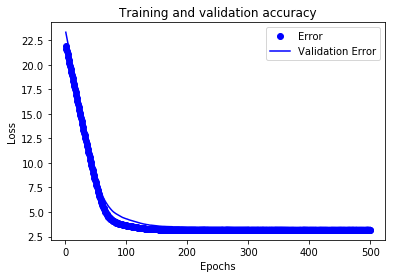

In [28]:
#Let us now plot our training history
import matplotlib.pyplot as plt

plt.clf()
error_values = history_dict['mean_absolute_error']
val_error_values = history_dict['val_mean_absolute_error']

epochs = range(1, len(error_values) + 1)
plt.plot(epochs, error_values, 'bo', label = 'Error')
plt.plot(epochs, val_error_values, 'b', label = 'Validation Error')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
# Evaluate the model on the validation data
loss, mae = model.evaluate(test_data, test_targets, verbose=1)
loss, mae

102/102 [==============================] - 0s 39us/step


(19.72368569467582, 3.168687371646657)